# Motor Vehicle Collisions and Crashes Analysis

This notebook analyzes a dataset of motor vehicle collisions and crashes, providing valuable insights into traffic safety patterns and potential areas for improvement. The analysis covers data cleaning, exploratory data analysis, and visualizations to uncover trends and relationships in the data.
## Data Overview

The dataset used in this analysis contains detailed information about motor vehicle collisions and crashes. Each record represents a single collision, with various attributes describing the circumstances and outcomes of the crash. The key columns in the dataset include:

- **CRASH DATE:** The date when the crash occurred.
- **CRASH TIME:** The time when the crash occurred.
- **BOROUGH:** The borough in New York City where the crash occurred.
- **ZIP CODE:** The ZIP code of the crash location.
- **LATITUDE:** The latitude of the crash location.
- **LONGITUDE:** The longitude of the crash location.
- **LOCATION:** Combined latitude and longitude of the crash location.
- **ON STREET NAME:** The name of the street where the crash occurred.
- **CROSS STREET NAME:** The name of the cross street closest to the crash location.
- **OFF STREET NAME:** The name of the off-street closest to the crash location.
- **NUMBER OF PERSONS INJURED:** The number of persons injured in the crash.
- **NUMBER OF PERSONS KILLED:** The number of persons killed in the crash.
- **NUMBER OF PEDESTRIANS INJURED:** The number of pedestrians injured in the crash.
- **NUMBER OF PEDESTRIANS KILLED:** The number of pedestrians killed in the crash.
- **NUMBER OF CYCLIST INJURED:** The number of cyclists injured in the crash.
- **NUMBER OF CYCLIST KILLED:** The number of cyclists killed in the crash.
- **NUMBER OF MOTORIST INJURED:** The number of motorists injured in the crash.
- **NUMBER OF MOTORIST KILLED:** The number of motorists killed in the crash.
- **CONTRIBUTING FACTOR VEHICLE 1:** The contributing factor of the first vehicle involved in the crash.
- **CONTRIBUTING FACTOR VEHICLE 2:** The contributing factor of the second vehicle involved in the crash.
- **COLLISION_ID:** A unique identifier for each crash.
- **VEHICLE TYPE CODE 1:** The type of the first vehicle involved in the crash.
- **VEHICLE TYPE CODE 2:** The type of the second vehicle involved in the crash.

This dataset allows for an in-depth analysis of crash patterns, contributing factors, and the spatial distribution of accidents, providing valuable insights for improving road safety.


By analyzing this data, we can identify patterns, hotspots, and contributing factors that may help in developing strategies to improve road safety and reduce the number of accidents.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Define the file path
file_path = '../Motor_Vehicle_Collisions_-_Crashes.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the columns and their data types
print("Columns and Data Types:")
print(df.dtypes)


Columns and Data Types:
CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED           int64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                     

## Data Cleaning
Before diving into the analysis, we perform several data cleaning steps to ensure the quality and integrity of the data:

1. Removing Duplicates: Duplicate rows are removed from the dataset to avoid skewing the analysis.

In [30]:
# Remove duplicates from the DataFrame
df = df.drop_duplicates()

# Display the DataFrame after removing duplicates
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179921 entries, 0 to 179920
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH DATE                     179921 non-null  object 
 1   CRASH TIME                     179921 non-null  object 
 2   BOROUGH                        118160 non-null  object 
 3   ZIP CODE                       118137 non-null  float64
 4   LATITUDE                       164788 non-null  float64
 5   LONGITUDE                      164788 non-null  float64
 6   LOCATION                       164788 non-null  object 
 7   ON STREET NAME                 130909 non-null  object 
 8   CROSS STREET NAME              83247 non-null   object 
 9   OFF STREET NAME                49010 non-null   object 
 10  NUMBER OF PERSONS INJURED      179920 non-null  float64
 11  NUMBER OF PERSONS KILLED       179921 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED 

2. Converting Date and Time Formats: The CRASH DATE and CRASH TIME columns are converted to datetime format for easier handling and analysis.

In [31]:
# Convert 'CRASH DATE' to datetime format
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], format='%d/%m/%Y')

# Convert 'CRASH TIME' to datetime
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M').dt.time

3. Handling Missing Values: We calculate the percentage of missing values for each column to identify potential issues and drop columns with a high percentage of missing data (e.g., columns related to third, fourth, and fifth vehicles).

In [32]:
# Calculate the percentage of missing values for each column
missing_percentages = (df.isnull().sum() / len(df)) * 100

# Print the percentage of missing values for each column
print(missing_percentages)

CRASH DATE                        0.000000
CRASH TIME                        0.000000
BOROUGH                          34.326732
ZIP CODE                         34.339516
LATITUDE                          8.410914
LONGITUDE                         8.410914
LOCATION                          8.410914
ON STREET NAME                   27.240845
CROSS STREET NAME                53.731360
OFF STREET NAME                  72.760267
NUMBER OF PERSONS INJURED         0.000556
NUMBER OF PERSONS KILLED          0.000000
NUMBER OF PEDESTRIANS INJURED     0.000000
NUMBER OF PEDESTRIANS KILLED      0.000000
NUMBER OF CYCLIST INJURED         0.000000
NUMBER OF CYCLIST KILLED          0.000000
NUMBER OF MOTORIST INJURED        0.000000
NUMBER OF MOTORIST KILLED         0.000000
CONTRIBUTING FACTOR VEHICLE 1     0.502443
CONTRIBUTING FACTOR VEHICLE 2    22.764436
CONTRIBUTING FACTOR VEHICLE 3    89.912239
CONTRIBUTING FACTOR VEHICLE 4    97.258241
CONTRIBUTING FACTOR VEHICLE 5    99.171859
COLLISION_I

4. Dropping Unnecessary Columns: Columns that are not relevant to the analysis or contain redundant information are dropped to streamline the dataset.

In [33]:
# List of columns to drop
columns_to_drop = ['VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
                   'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
                   'CONTRIBUTING FACTOR VEHICLE 5']

# Drop the specified columns
df_cleaned = df.drop(columns=columns_to_drop)

# Display the DataFrame after dropping columns
print(df_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179921 entries, 0 to 179920
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH DATE                     179921 non-null  datetime64[ns]
 1   CRASH TIME                     179921 non-null  object        
 2   BOROUGH                        118160 non-null  object        
 3   ZIP CODE                       118137 non-null  float64       
 4   LATITUDE                       164788 non-null  float64       
 5   LONGITUDE                      164788 non-null  float64       
 6   LOCATION                       164788 non-null  object        
 7   ON STREET NAME                 130909 non-null  object        
 8   CROSS STREET NAME              83247 non-null   object        
 9   OFF STREET NAME                49010 non-null   object        
 10  NUMBER OF PERSONS INJURED      179920 non-null  float64       
 11  

In [34]:
# Remove duplicates from the DataFrame
df_cleaned = df_cleaned.drop_duplicates()

# Display the DataFrame after removing duplicates
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179921 entries, 0 to 179920
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH DATE                     179921 non-null  datetime64[ns]
 1   CRASH TIME                     179921 non-null  object        
 2   BOROUGH                        118160 non-null  object        
 3   ZIP CODE                       118137 non-null  float64       
 4   LATITUDE                       164788 non-null  float64       
 5   LONGITUDE                      164788 non-null  float64       
 6   LOCATION                       164788 non-null  object        
 7   ON STREET NAME                 130909 non-null  object        
 8   CROSS STREET NAME              83247 non-null   object        
 9   OFF STREET NAME                49010 non-null   object        
 10  NUMBER OF PERSONS INJURED      179920 non-null  float64       
 11  

After data cleaning, we have a more refined and reliable dataset for analysis.
## Exploratory Data Analysis
To gain insights into the data, we perform exploratory data analysis by calculating summary statistics and creating visualizations:
### Crash Patterns by Day and Time
We analyze the distribution of crashes by day of the week and hour of the day to identify potential patterns and peak times:

- Distribution of Crashes by Day of the Week: A bar plot shows the number of crashes for each day of the week, revealing which days tend to have more accidents.

In [35]:
# Calculate the day of the week and hour of the day from the 'CRASH DATE' and 'CRASH TIME' columns
df_cleaned['Day of Week'] = df_cleaned['CRASH DATE'].dt.weekday
df_cleaned['Hour of Day'] = df_cleaned['CRASH TIME'].apply(lambda x: pd.Timestamp.combine(pd.Timestamp.today(), x).hour)

In [36]:
# Calculate summary statistics for day of the week and hour of the day
day_of_week_stats = df_cleaned['Day of Week'].describe()
hour_of_day_stats = df_cleaned['Hour of Day'].describe()

# Print summary statistics
print("Summary statistics for day of the week:\n", day_of_week_stats)
print("\nSummary statistics for hour of the day:\n", hour_of_day_stats)

Summary statistics for day of the week:
 count    179921.000000
mean          2.991869
std           1.968727
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: Day of Week, dtype: float64

Summary statistics for hour of the day:
 count    179921.000000
mean         12.834844
std           6.278020
min           0.000000
25%           8.000000
50%          14.000000
75%          18.000000
max          23.000000
Name: Hour of Day, dtype: float64


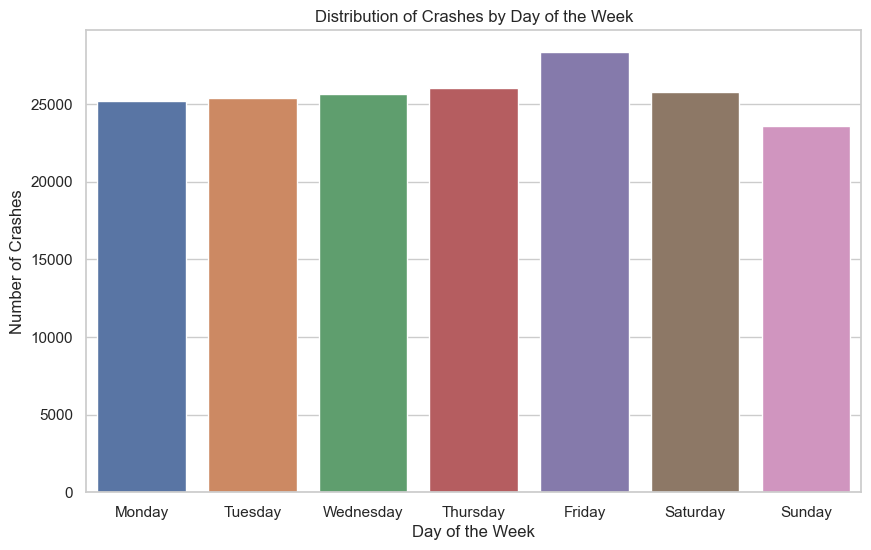

In [37]:
# Plot the distribution of crashes by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='Day of Week', data=df_cleaned)
plt.title('Distribution of Crashes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

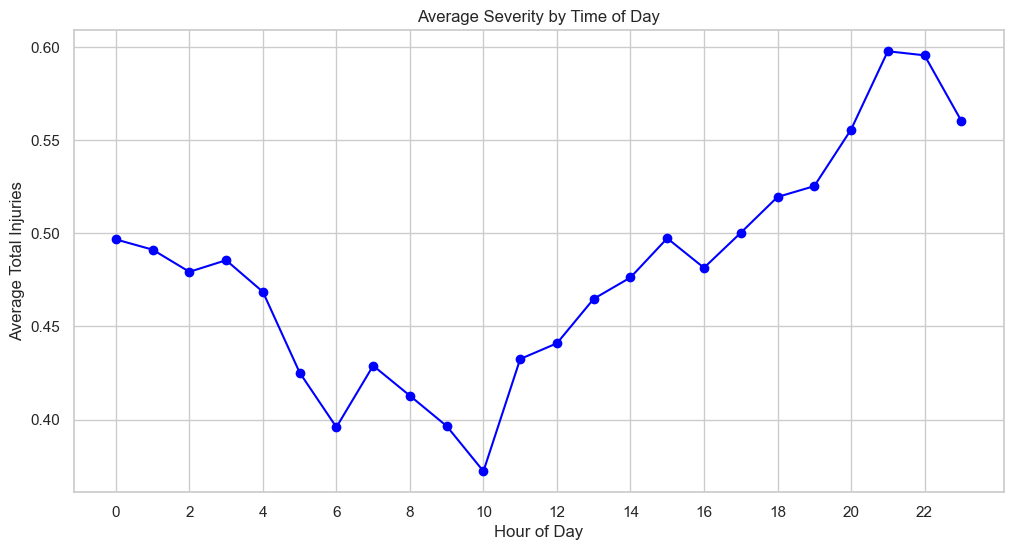

In [38]:
# Severity by Time of Day
plt.figure(figsize=(12, 6))

df_cleaned['Total Injuries'] = df_cleaned['NUMBER OF PERSONS INJURED'] + df_cleaned['NUMBER OF PERSONS KILLED']

# Calculate the average total injuries for each hour of the day
hourly_severity = df_cleaned.groupby('Hour of Day')['Total Injuries'].mean()

plt.plot(hourly_severity.index, hourly_severity.values, marker='o', linestyle='-', color='blue')
plt.title('Average Severity by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Total Injuries')
plt.xticks(range(0, 24, 2))  # Set x-ticks every 2 hours
plt.grid(True)
plt.show()

### Number of Crashes by Month: 
- A bar plot displays the number of crashes per month, helping us identify seasonal patterns or trends.

In [39]:
# Count the number of crashes by month
df_cleaned['Month'] = df_cleaned['CRASH DATE'].dt.month
crashes_by_month = df_cleaned['Month'].value_counts().sort_index()

print("Number of crashes by month (1-12):\n", crashes_by_month)


Number of crashes by month (1-12):
 Month
1     15631
2     14351
3     17105
4     17287
5     19783
6     20053
7     18798
8     18170
9     10486
10    10241
11     9429
12     8587
Name: count, dtype: int64


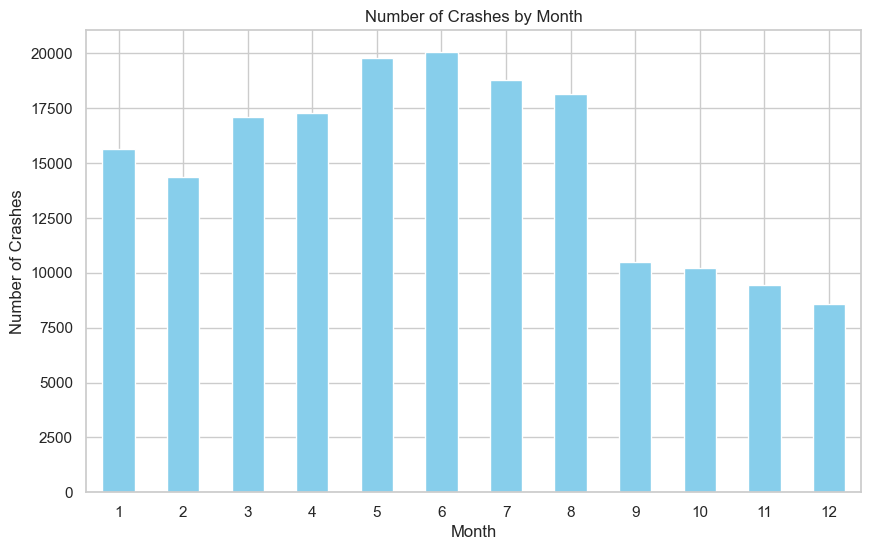

In [40]:
# Plot the number of crashes by month using a bar plot
plt.figure(figsize=(10, 6))
crashes_by_month.plot(kind='bar', color='skyblue')
plt.title('Number of Crashes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=0)
plt.show()

### Number of Crashes by Year: 
- A line plot shows the yearly trend in the number of crashes, allowing us to identify any significant increases or decreases over time.


Number of crashes by year:
 Year
2021    110525
2022     69228
2023       131
2024        37
Name: count, dtype: int64


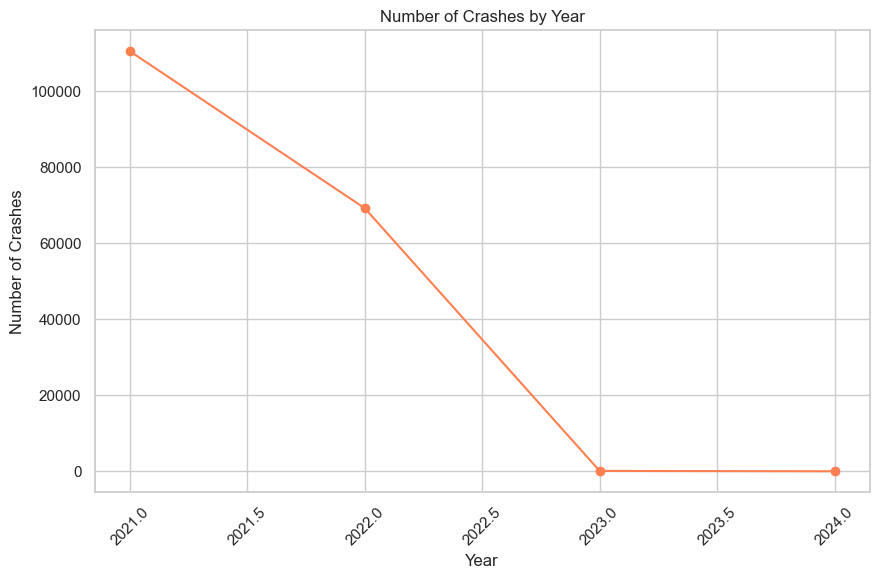

In [41]:
# Count the number of crashes by year
df_cleaned['Year'] = df_cleaned['CRASH DATE'].dt.year
crashes_by_year = df_cleaned['Year'].value_counts().sort_index()
print("\nNumber of crashes by year:\n", crashes_by_year)
# Plot the number of crashes by year using a line plot
plt.figure(figsize=(10, 6))
crashes_by_year.plot(kind='line', marker='o', color='coral')
plt.title('Number of Crashes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Contributing Factors
Understanding the contributing factors behind crashes is crucial for developing effective preventive measures:

### Top Contributing Factors by Severity: 
- A bar plot displays the top contributing factors (excluding "Unspecified") ranked by their total severity, calculated as the sum of injuries and fatalities. This analysis highlights the most critical factors to target for reducing the overall severity of crashes.

In [42]:
# Severity by Contributing Factors (excluding "Unspecified")
severity_factors = df_cleaned[df_cleaned['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified'].groupby('CONTRIBUTING FACTOR VEHICLE 1').agg({'NUMBER OF PERSONS INJURED': 'sum', 'NUMBER OF PERSONS KILLED': 'sum'}).reset_index()

severity_factors = severity_factors.melt(id_vars='CONTRIBUTING FACTOR VEHICLE 1', var_name='Severity', value_name='Count')

severity_factors

,CONTRIBUTING FACTOR VEHICLE 1,Severity,Count
0,Accelerator Defective,NUMBER OF PERSONS INJURED,100.0
1,Aggressive Driving/Road Rage,NUMBER OF PERSONS INJURED,752.0
2,Alcohol Involvement,NUMBER OF PERSONS INJURED,1556.0
3,Animals Action,NUMBER OF PERSONS INJURED,20.0
4,Backing Unsafely,NUMBER OF PERSONS INJURED,1238.0
...,...,...,...
103,Unsafe Speed,NUMBER OF PERSONS KILLED,117.0
104,Using On Board Navigation Device,NUMBER OF PERSONS KILLED,0.0
105,Vehicle Vandalism,NUMBER OF PERSONS KILLED,0.0
106,View Obstructed/Limited,NUMBER OF PERSONS KILLED,4.0


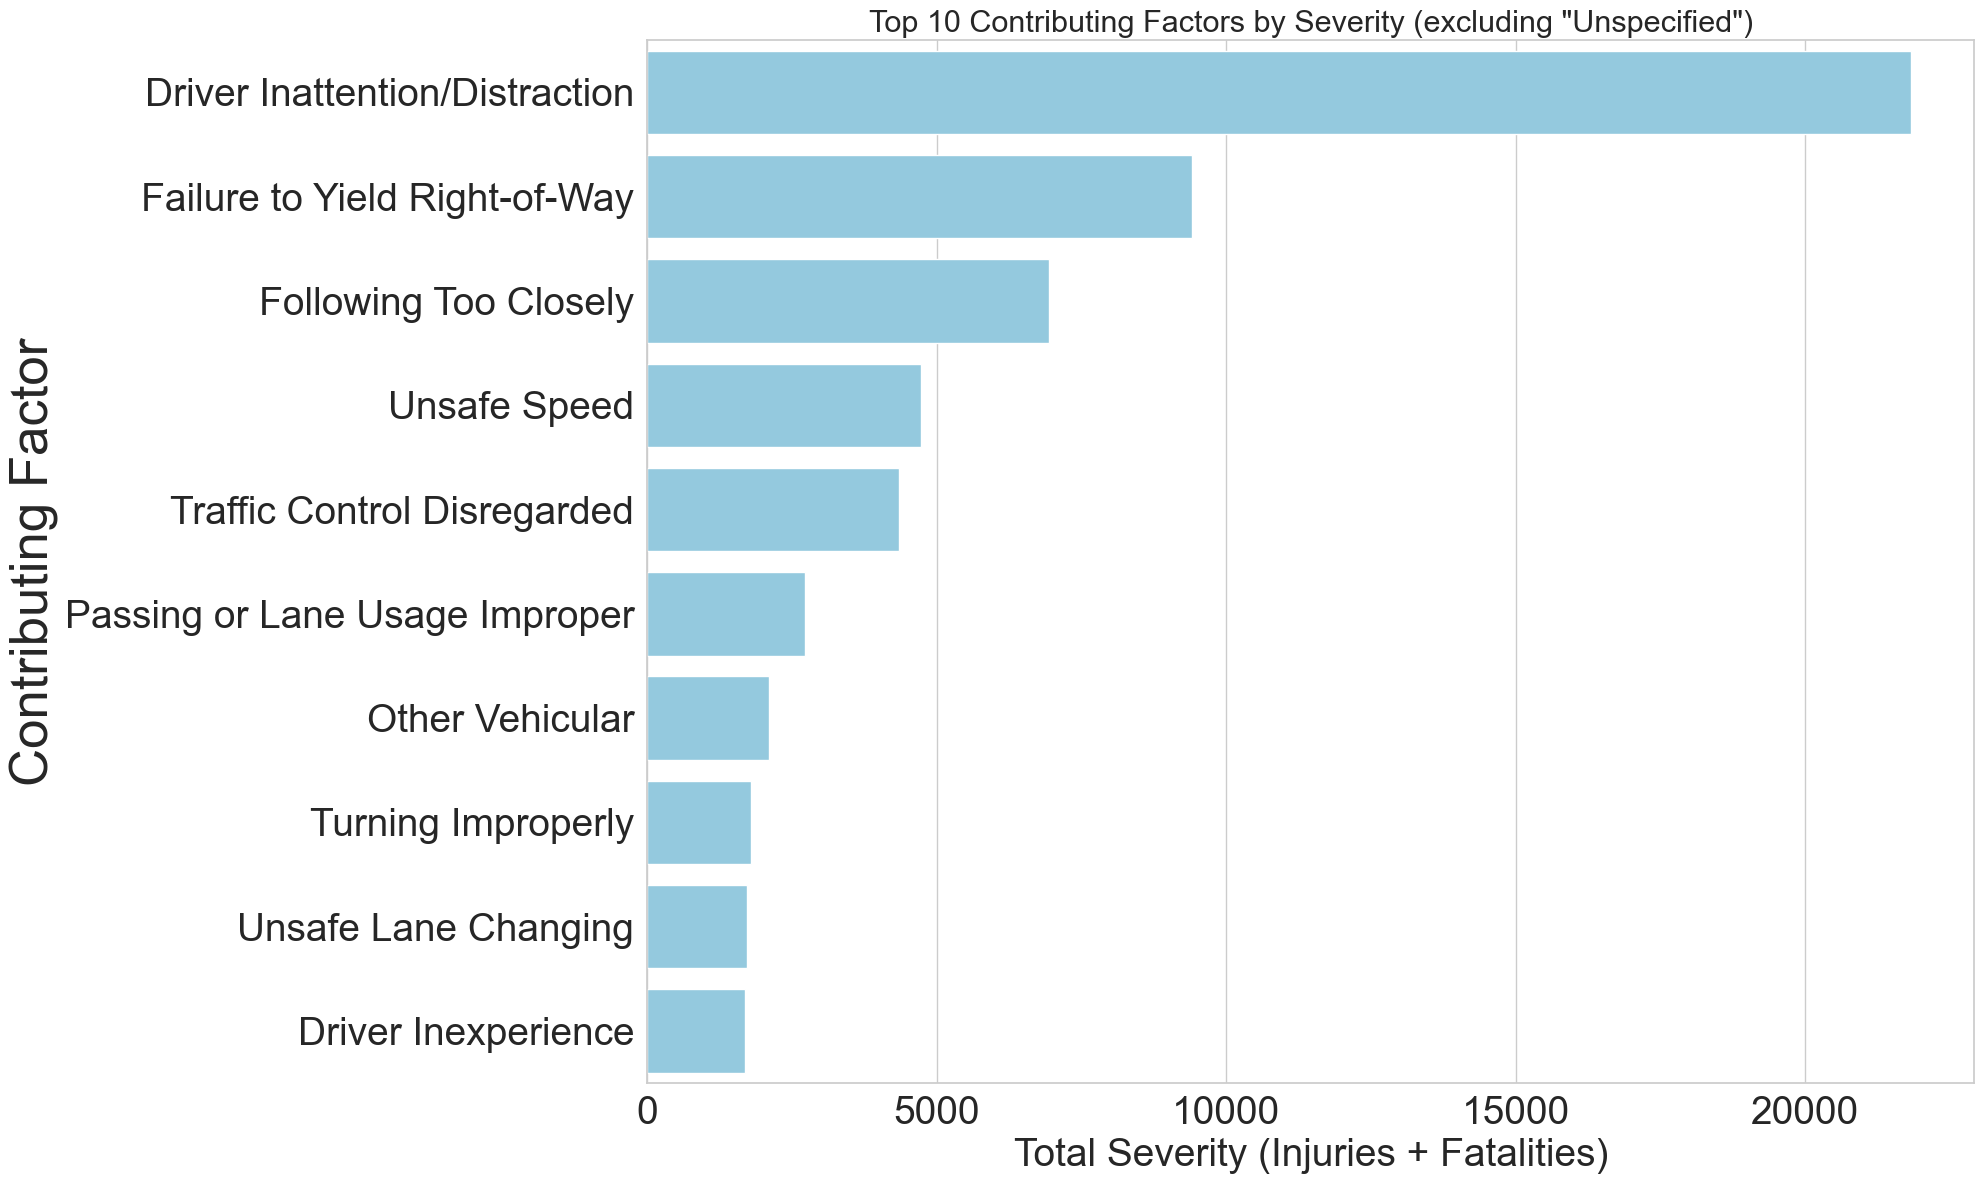

In [43]:
# Severity by Contributing Factors (excluding "Unspecified")
severity_factors = df_cleaned[df_cleaned['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified'].groupby('CONTRIBUTING FACTOR VEHICLE 1').agg({'NUMBER OF PERSONS INJURED': 'sum', 'NUMBER OF PERSONS KILLED': 'sum'}).reset_index()

# Sort the contributing factors by total severity (injuries + fatalities)
severity_factors['Total Severity'] = severity_factors['NUMBER OF PERSONS INJURED'] + severity_factors['NUMBER OF PERSONS KILLED']
severity_factors = severity_factors.sort_values('Total Severity', ascending=False)

# Select the top 10 contributing factors
top_factors = severity_factors.head(10)

# Create a stacked bar chart
plt.figure(figsize=(20, 12))
sns.set(style="whitegrid")

ax = sns.barplot(x="Total Severity", y="CONTRIBUTING FACTOR VEHICLE 1", data=top_factors, color='skyblue', label='Total Severity')
ax.set_xlabel('Total Severity (Injuries + Fatalities)', fontsize=28)
ax.set_ylabel('Contributing Factor', fontsize=38)
ax.set_title('Top 10 Contributing Factors by Severity (excluding "Unspecified")', fontsize=22)

# Increase the font size of y-axis labels
plt.yticks(fontsize=28)

# Increase the font size of y-axis labels
plt.xticks(fontsize=28)

plt.tight_layout()
plt.show()

### Geographic Distribution and Vehicle Types
Analyzing the geographic distribution of crashes and the types of vehicles involved can help identify areas or vehicle categories that require special attention:

### Crashes by Borough: 
- A bar plot illustrates the number of crashes in each borough, highlighting potential hotspots or areas with higher accident rates.

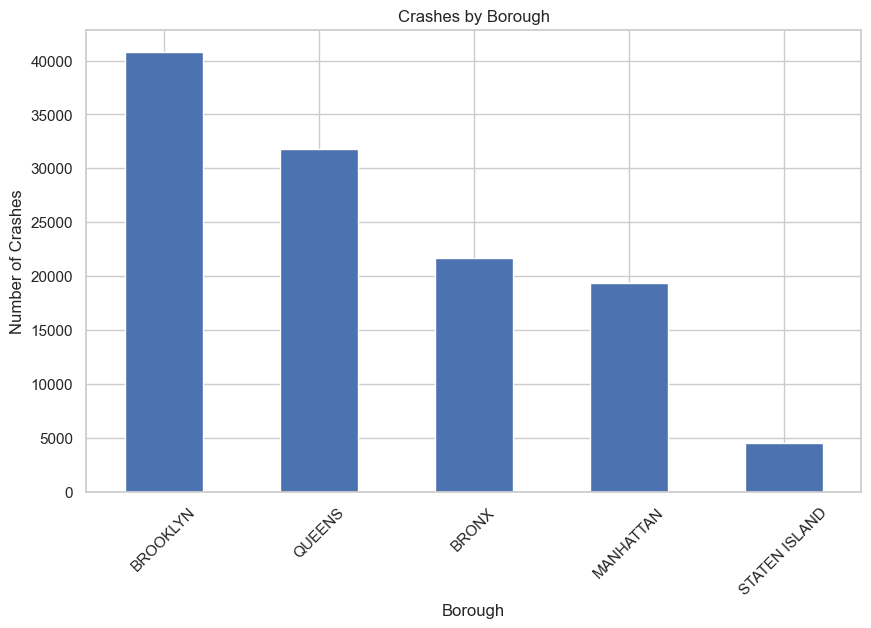

In [44]:
# Count the number of crashes in each borough
borough_crashes = df_cleaned['BOROUGH'].value_counts()

# Create a bar chart of crashes by borough
plt.figure(figsize=(10, 6))
borough_crashes.plot(kind='bar')
plt.xlabel('Borough')
plt.ylabel('Number of Crashes')
plt.title('Crashes by Borough')
plt.xticks(rotation=45)
plt.show()

### Crashes by Vehicle Type: 
- A pie chart displays the distribution of crashes by vehicle type, allowing us to identify if certain types of vehicles are more prone to accidents and may require targeted safety measures or regulations.

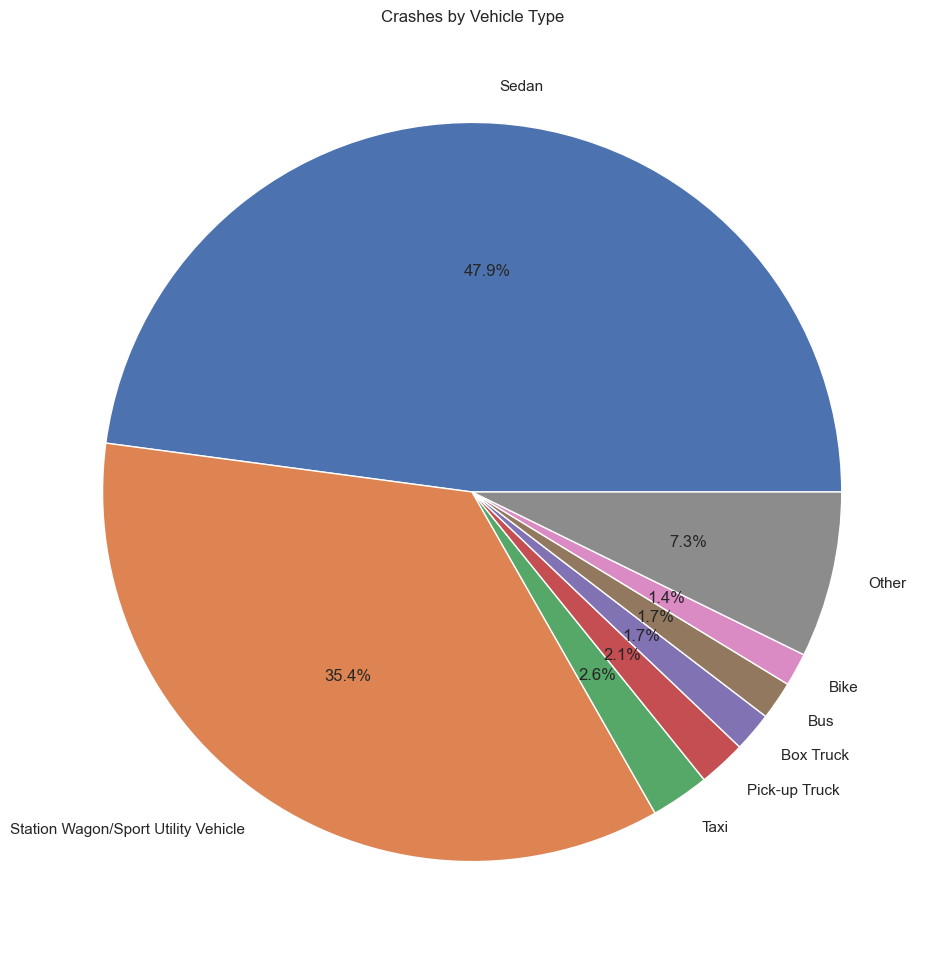

In [45]:
# Count the number of crashes by vehicle type
vehicle_type_crashes = df_cleaned['VEHICLE TYPE CODE 1'].value_counts()

# Calculate the percentage of crashes for each vehicle type
vehicle_type_percentages = vehicle_type_crashes / vehicle_type_crashes.sum() * 100

# Create a new Series with vehicle types having a percentage greater than or equal to 1%
vehicle_type_percentages_filtered = vehicle_type_percentages[vehicle_type_percentages >= 1]

# Create a new category "Other" for vehicle types with a percentage lower than 1%
other_percentage = 100 - vehicle_type_percentages_filtered.sum()
vehicle_type_percentages_filtered['Other'] = other_percentage

# Create a pie chart of crashes by vehicle type
plt.figure(figsize=(12, 12))
plt.pie(vehicle_type_percentages_filtered, labels=vehicle_type_percentages_filtered.index, autopct='%1.1f%%')
plt.title('Crashes by Vehicle Type')
plt.show()

## Predicting Vehicle Crashes with Injuries in New York City
In this analysis, we aim to develop a machine learning model that predicts vehicle crashes with injuries in New York City. By focusing on crashes that result in injuries, we can provide valuable insights to stakeholders and decision-makers, enabling them to prioritize interventions and allocate resources effectively.
### Data Preprocessing
We begin by preprocessing the data and selecting relevant features for our model. The target variable is transformed into a binary classification problem, where 1 represents crashes with one or more injuries and 0 represents crashes with no injuries.
The selected features include:

#### Contributing factor of the first vehicle
- Type of the first vehicle
- Borough where the crash occurred
- Date and time of the crash (extracted as separate features)

We handle the 'CRASH TIME' column separately, converting it to a suitable format for analysis.
Model Training and Evaluation

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Preprocess the data
target = 'INJURIES'  # New binary target variable
df_cleaned[target] = (df_cleaned['NUMBER OF PERSONS INJURED'] > 0).astype(int)

features = ['CONTRIBUTING FACTOR VEHICLE 1', 'VEHICLE TYPE CODE 1', 'BOROUGH']

# Handle the 'CRASH TIME' column separately
df_cleaned['CRASH TIME'] = df_cleaned['CRASH TIME'].astype(str)
df_cleaned['CRASH TIME'] = df_cleaned['CRASH TIME'].str.slice(0, 5)
df_cleaned['CRASH TIME'] = pd.to_datetime(df_cleaned['CRASH TIME'], format='%H:%M').dt.time

# Extract features from date and time columns
df_cleaned['CRASH DAY'] = df_cleaned['CRASH DATE'].dt.day
df_cleaned['CRASH MONTH'] = df_cleaned['CRASH DATE'].dt.month
df_cleaned['CRASH YEAR'] = df_cleaned['CRASH DATE'].dt.year
df_cleaned['CRASH HOUR'] = df_cleaned['CRASH TIME'].apply(lambda x: x.hour)
features.extend(['CRASH DAY', 'CRASH MONTH', 'CRASH YEAR', 'CRASH HOUR'])

X = df_cleaned[features]
y = df_cleaned[target]

# Encode categorical variables
categorical_cols = ['CONTRIBUTING FACTOR VEHICLE 1', 'VEHICLE TYPE CODE 1', 'BOROUGH']
numerical_cols = ['CRASH DAY', 'CRASH MONTH', 'CRASH YEAR', 'CRASH HOUR']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ])

#### Model Training and Evaluation
We split the data into training and testing sets and create a machine learning pipeline using a Random Forest Classifier. The pipeline includes a preprocessor for encoding categorical variables and handling numerical features. After training the model, we evaluate its performance using a classification report and analyze the feature importances to identify the most significant factors contributing to crashes with injuries.

In [47]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a machine learning pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74     23157
           1       0.51      0.40      0.45     12828

    accuracy                           0.65     35985
   macro avg       0.61      0.59      0.60     35985
weighted avg       0.63      0.65      0.64     35985



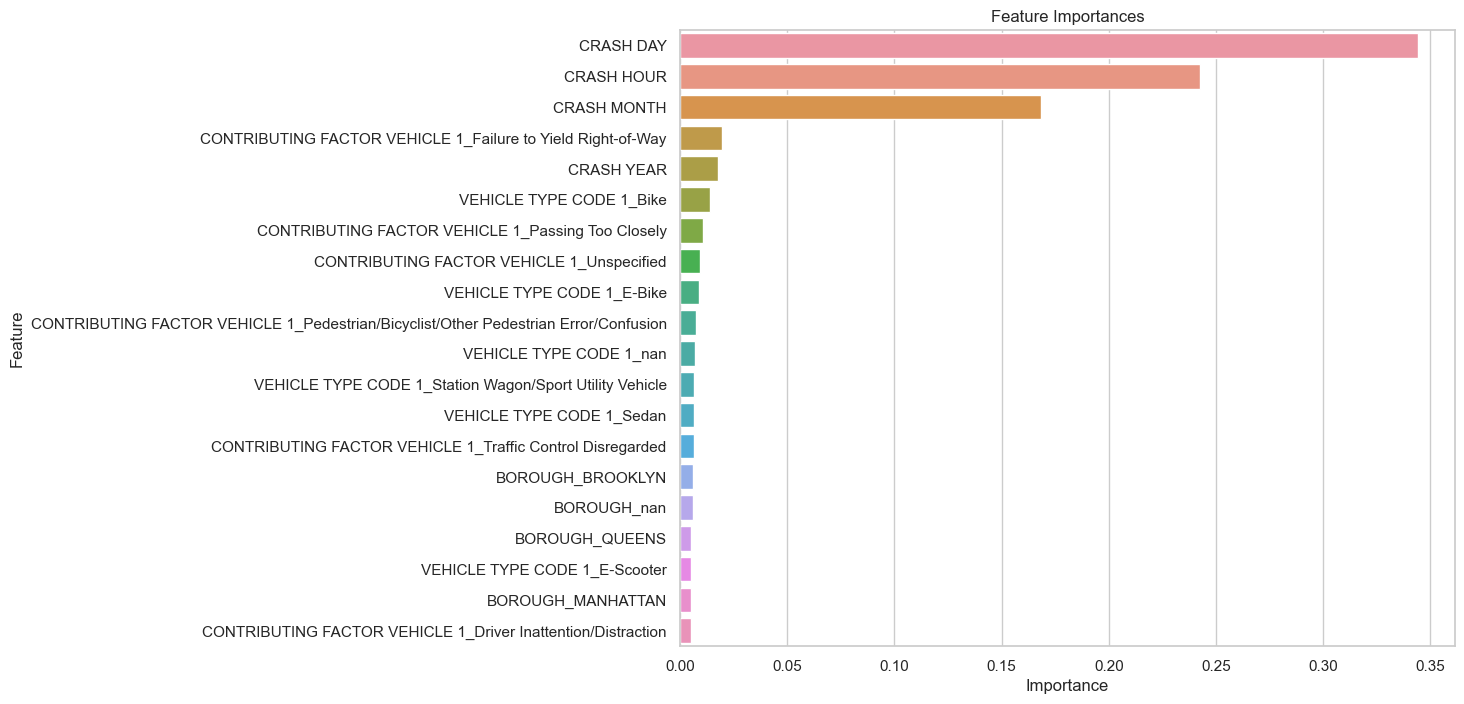

In [48]:
# Plot feature importances
importances = model_pipeline.named_steps['classifier'].feature_importances_
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist() + numerical_cols
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances[:20])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### Results and Insights
The classification report provides an overview of the model's performance in predicting crashes with injuries. We can assess the model's precision, recall, and f1-score for each class (crashes with injuries and crashes without injuries). By examining the feature importances, we can identify the top contributing factors for crashes with injuries. The feature importance plot visually represents the most significant factors.

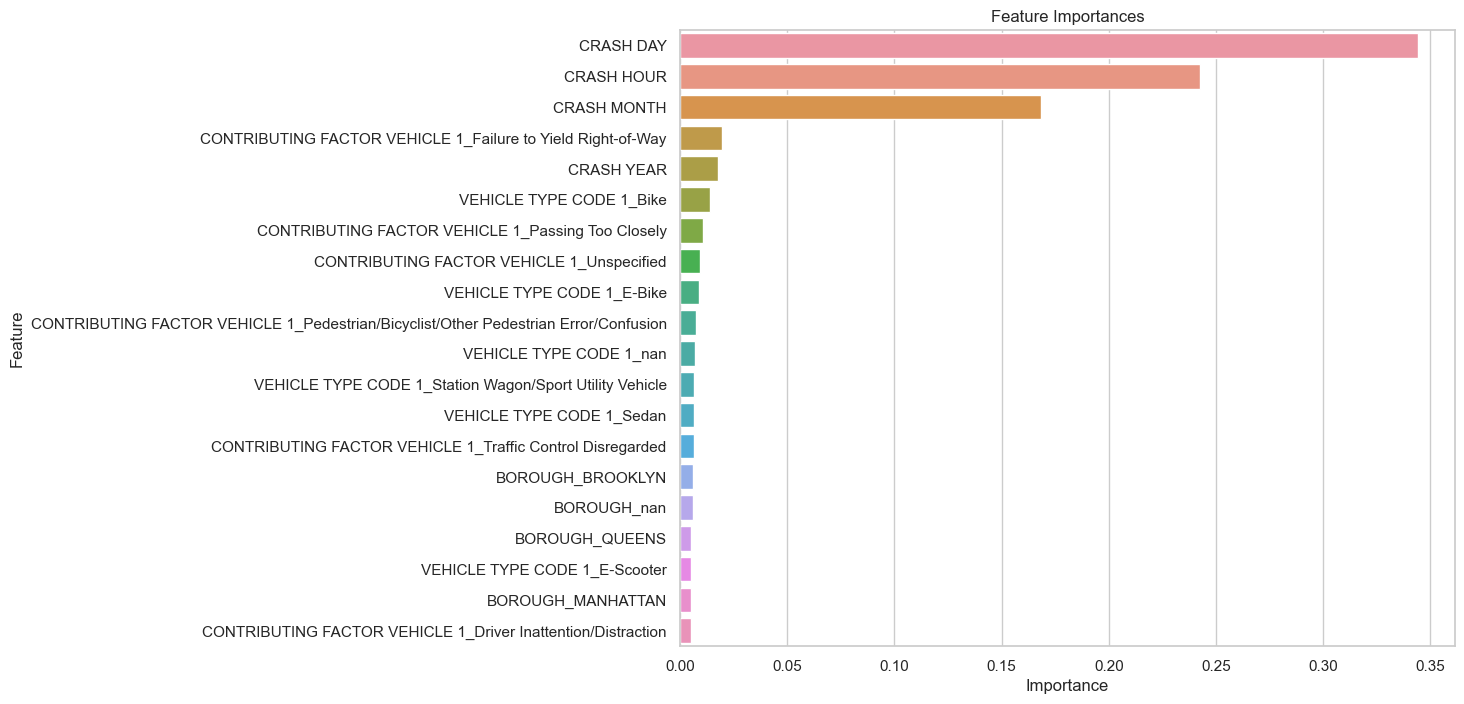


Top contributing factors for crashes with injuries:
                                               Feature  Importance
493                                          CRASH DAY    0.344181
496                                         CRASH HOUR    0.242672
494                                        CRASH MONTH    0.168361
14   CONTRIBUTING FACTOR VEHICLE 1_Failure to Yield...    0.019551
495                                         CRASH YEAR    0.017843
87                            VEHICLE TYPE CODE 1_Bike    0.014036
31   CONTRIBUTING FACTOR VEHICLE 1_Passing Too Closely    0.010975
50           CONTRIBUTING FACTOR VEHICLE 1_Unspecified    0.009335
135                         VEHICLE TYPE CODE 1_E-Bike    0.008974
35   CONTRIBUTING FACTOR VEHICLE 1_Pedestrian/Bicyc...    0.007531


In [49]:
# Feature importance
importances = model_pipeline.named_steps['classifier'].feature_importances_
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist() + numerical_cols
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances[:20])
plt.title('Feature Importances')
plt.show()

# Analyze results for actionable insights
print("\nTop contributing factors for crashes with injuries:")
print(feature_importances[:10])

### Interpretation of the Model's Output
#### The model provides several insights into the factors that are most important in predicting crashes with injuries:

- **Crash Day and Time:**  The day of the crash and the hour of the day are the most significant factors. This suggests that certain days and times are more prone to accidents with injuries. For example, crashes occurring during rush hours on weekdays might have a higher likelihood of resulting in injuries.
- **Crash Month:** The month of the crash also plays a significant role, indicating possible seasonal trends in crash severity. For instance, winter months with adverse weather conditions may see more crashes with injuries.
- **Contributing Factors:** Specific contributing factors like "Failure to Yield Right-of-Way" are also important. This indicates that certain driver behaviors significantly increase the risk of injuries in crashes.
- **Vehicle Types:** Certain types of vehicles, such as bikes and e-bikes, are more likely to be involved in crashes with injuries. This suggests that these road users might be more vulnerable and require targeted safety measures.
- **Geographic Location:** The borough where the crash occurred is also a key factor, highlighting the importance of local traffic conditions and infrastructure in determining crash outcomes.

### Actionable Recommendations and Insights
Based on the analysis of feature importances and the model's results, we can provide actionable recommendations to stakeholders. These may include:

- **Prioritizing Interventions:** Focus interventions in specific boroughs or areas where crashes with injuries are more prevalent.
- **Targeted Safety Measures:** Focus on specific vehicle types or contributing factors that have a higher association with injuries.
- **Safety Campaigns:** Implement targeted safety campaigns or infrastructure improvements based on the identified patterns and trends.

By developing a machine learning model focused on predicting vehicle crashes with injuries in New York City, we can provide valuable insights to stakeholders and support data-driven decision-making for traffic safety and injury prevention. The identified contributing factors and actionable recommendations serve as a starting point for targeted interventions and resource allocation. However, it's crucial to continue refining the model, incorporating additional data sources, and conducting thorough analyses to enhance its predictive power and deliver more comprehensive insights. Collaboration with domain experts and stakeholders is essential to ensure the model's outputs are effectively translated into impactful actions. Through this iterative process of model development, analysis, and stakeholder engagement, we can work towards the goal of reducing vehicle crashes with injuries and improving overall traffic safety in New York City.

### Conclusion
By developing a machine learning model focused on predicting vehicle crashes with injuries in New York City, we can provide valuable insights to stakeholders and support data-driven decision-making for traffic safety and injury prevention. The identified contributing factors and actionable recommendations serve as a starting point for targeted interventions and resource allocation. However, it's crucial to continue refining the model, incorporating additional data sources, and conducting thorough analyses to enhance its predictive power and deliver more comprehensive insights. Collaboration with domain experts and stakeholders is essential to ensure the model's outputs are effectively translated into impactful actions. Through this iterative process of model development, analysis, and stakeholder engagement, we can work towards the goal of reducing vehicle crashes with injuries and improving overall traffic safety in New York City.

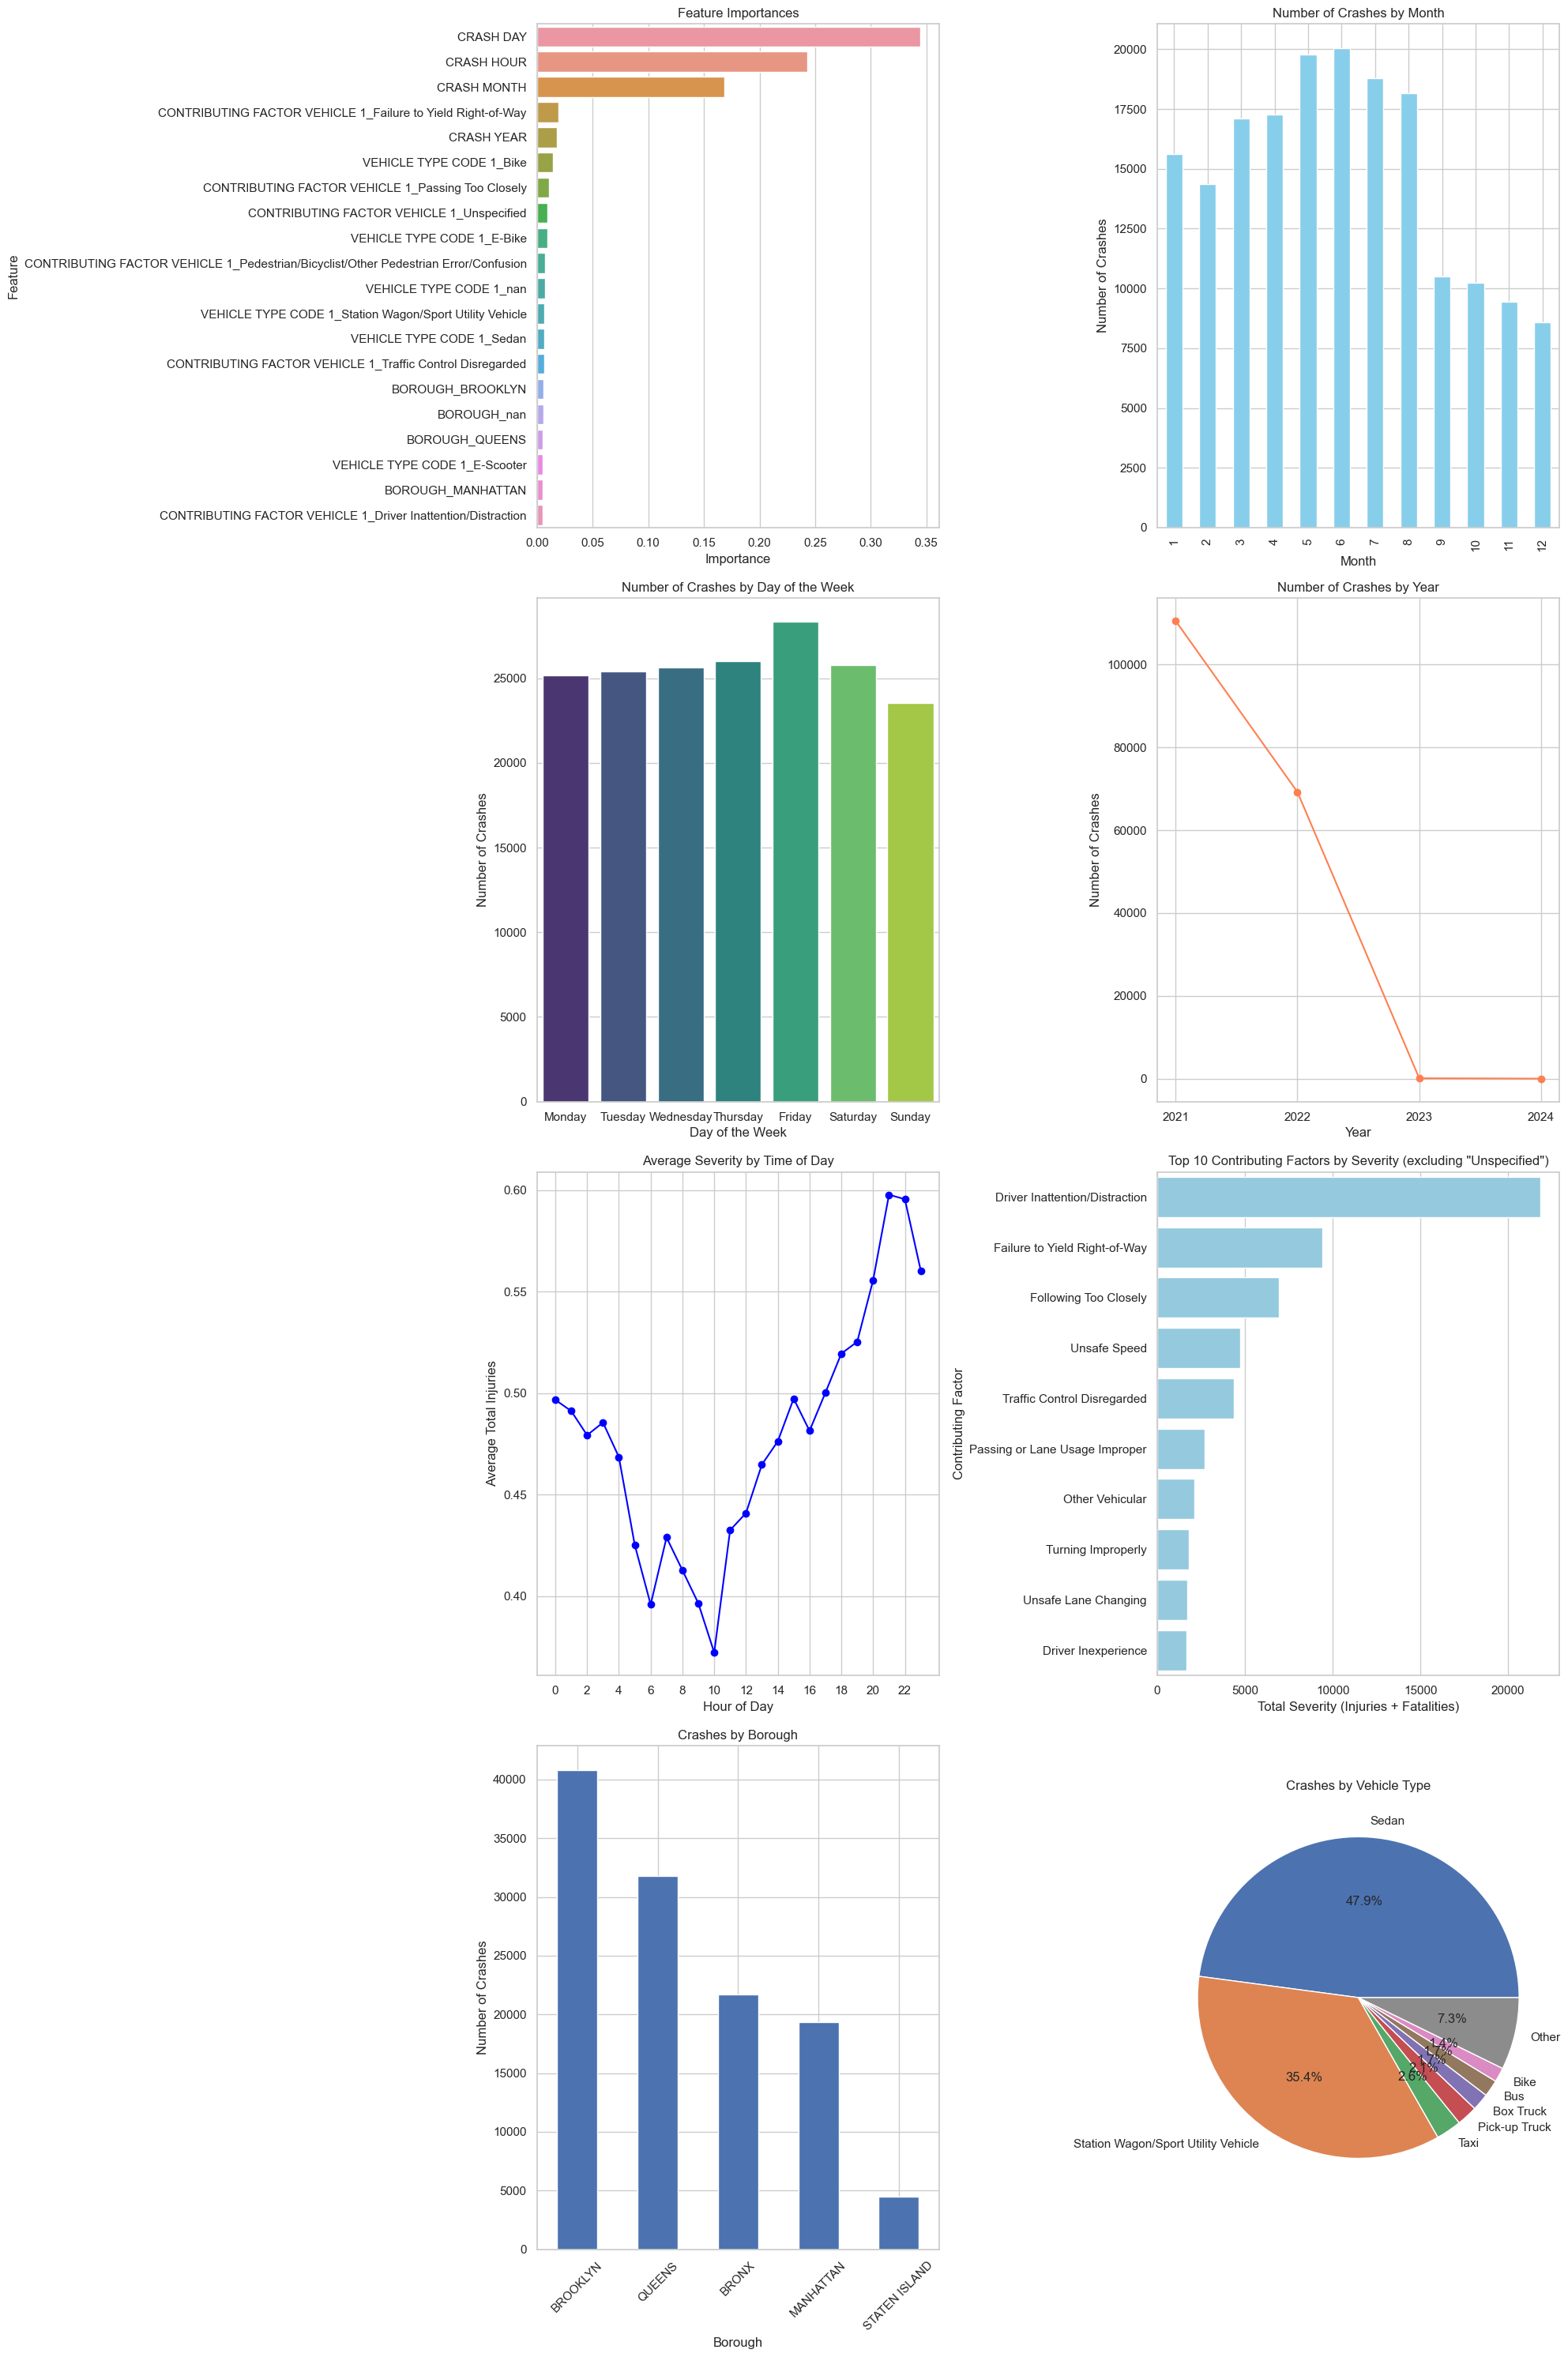

In [50]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 30))

# Plot 1: Feature Importances (Bar Plot)
importances = model_pipeline.named_steps['classifier'].feature_importances_
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist() + numerical_cols
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_importances[:20], ax=axes[0, 0])
axes[0, 0].set_title('Feature Importances')
axes[0, 0].set_xlabel('Importance')
axes[0, 0].set_ylabel('Feature')

# Plot 2: Number of Crashes by Month (Bar Plot)
crashes_by_month = df_cleaned['CRASH DATE'].dt.month.value_counts().sort_index()
crashes_by_month.plot(kind='bar', color='skyblue', ax=axes[0, 1])
axes[0, 1].set_title('Number of Crashes by Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Number of Crashes')
axes[0, 1].set_xticklabels(range(1, 13))

# Plot 3: Number of Crashes by Day of the Week (Count Plot)
sns.countplot(x='Day of Week', data=df_cleaned, ax=axes[1, 0], palette='viridis', order=range(7))
axes[1, 0].set_title('Number of Crashes by Day of the Week')
axes[1, 0].set_xlabel('Day of the Week')
axes[1, 0].set_ylabel('Number of Crashes')
axes[1, 0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)

# Plot 4: Number of Crashes by Year (Line Plot)
crashes_by_year = df_cleaned['CRASH DATE'].dt.year.value_counts().sort_index()
crashes_by_year.plot(kind='line', marker='o', color='coral', ax=axes[1, 1])
axes[1, 1].set_title('Number of Crashes by Year')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Number of Crashes')
axes[1, 1].set_xticks(crashes_by_year.index)

# Plot 5: Average Severity by Time of Day (Line Plot)
df_cleaned['Total Injuries'] = df_cleaned['NUMBER OF PERSONS INJURED'] + df_cleaned['NUMBER OF PERSONS KILLED']
hourly_severity = df_cleaned.groupby('CRASH HOUR')['Total Injuries'].mean()
axes[2, 0].plot(hourly_severity.index, hourly_severity.values, marker='o', linestyle='-', color='blue')
axes[2, 0].set_title('Average Severity by Time of Day')
axes[2, 0].set_xlabel('Hour of Day')
axes[2, 0].set_ylabel('Average Total Injuries')
axes[2, 0].set_xticks(range(0, 24, 2))  # Set x-ticks every 2 hours
axes[2, 0].grid(True)

# Plot 6: Top 10 Contributing Factors by Severity (Bar Plot)
severity_factors = df_cleaned[df_cleaned['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified'].groupby('CONTRIBUTING FACTOR VEHICLE 1').agg({'NUMBER OF PERSONS INJURED': 'sum', 'NUMBER OF PERSONS KILLED': 'sum'}).reset_index()
severity_factors['Total Severity'] = severity_factors['NUMBER OF PERSONS INJURED'] + severity_factors['NUMBER OF PERSONS KILLED']
top_factors = severity_factors.sort_values('Total Severity', ascending=False).head(10)
sns.barplot(x="Total Severity", y="CONTRIBUTING FACTOR VEHICLE 1", data=top_factors, ax=axes[2, 1], color='skyblue')
axes[2, 1].set_title('Top 10 Contributing Factors by Severity (excluding "Unspecified")')
axes[2, 1].set_xlabel('Total Severity (Injuries + Fatalities)')
axes[2, 1].set_ylabel('Contributing Factor')

# Plot 7: Crashes by Borough (Bar Plot)
borough_crashes = df_cleaned['BOROUGH'].value_counts()
borough_crashes.plot(kind='bar', ax=axes[3, 0])
axes[3, 0].set_title('Crashes by Borough')
axes[3, 0].set_xlabel('Borough')
axes[3, 0].set_ylabel('Number of Crashes')
axes[3, 0].set_xticklabels(borough_crashes.index, rotation=45)

# Plot 8: Crashes by Vehicle Type (Pie Chart)
vehicle_type_crashes = df_cleaned['VEHICLE TYPE CODE 1'].value_counts()
vehicle_type_percentages = vehicle_type_crashes / vehicle_type_crashes.sum() * 100
vehicle_type_percentages_filtered = vehicle_type_percentages[vehicle_type_percentages >= 1]
other_percentage = 100 - vehicle_type_percentages_filtered.sum()
vehicle_type_percentages_filtered['Other'] = other_percentage
axes[3, 1].pie(vehicle_type_percentages_filtered, labels=vehicle_type_percentages_filtered.index, autopct='%1.1f%%')
axes[3, 1].set_title('Crashes by Vehicle Type')

# Adjust layout
plt.tight_layout()
plt.show()

# Conclusion
Through this comprehensive analysis of motor vehicle collisions and crashes in New York City, we have gained valuable insights into the patterns, trends, and factors contributing to traffic accidents.
Our exploratory data analysis revealed notable patterns in the temporal distribution of crashes, with variations observed by day of the week, month, and year. The visualizations highlighted the higher frequency of crashes on weekdays, particularly during peak traffic hours, but also the overall decreasing trend in the number of crashes over the years.

By investigating the contributing factors, we identified the most critical factors associated with crashes resulting in injuries and fatalities. The top contributing factors, such as driver inattention/distraction, failure to yield right-of-way, and following too closely, provide targeted areas for intervention and education to improve road safety.
The geographic analysis of crashes by borough shed light on the spatial distribution of accidents, enabling stakeholders to prioritize resources and implement localized safety measures in high-risk areas.

Furthermore, the machine learning model developed to predict crashes with injuries demonstrated the potential of data-driven approaches in identifying key factors and informing decision-making. The feature importance analysis highlighted the most influential variables in predicting crashes with injuries, providing additional insights for targeted interventions.
However, it is important to acknowledge the limitations of the analysis and the need for continuous refinement and improvement. Incorporating additional data sources, such as weather conditions, road characteristics, and traffic volume, can enhance the predictive power of the model and provide a more comprehensive understanding of the factors contributing to crashes.

Moving forward, collaboration among stakeholders, including transportation authorities, law enforcement, and public health officials, is crucial to translating these insights into effective policies, campaigns, and infrastructure improvements. By leveraging the power of data analytics and machine learning, we can work towards the ultimate goal of reducing motor vehicle collisions, minimizing injuries and fatalities, and creating safer roads for all users in New York City.

## Limitations and Future Work

### Limitations
1. **Missing Data:** A significant portion of the data contains missing values, particularly in columns related to location details and contributing factors of additional vehicles. This may limit the comprehensiveness of the analysis.
2. **Data Quality:** Some entries may contain inaccuracies or inconsistencies, such as incorrect dates or times, which can affect the reliability of the analysis.
3. **Temporal Scope:** The dataset covers a specific period, and trends observed may not be indicative of future patterns or long-term trends.
4. **Geographic Focus:** The analysis is limited to New York City, so findings may not be generalizable to other regions with different traffic conditions and regulations.
5. **Lack of Contextual Data:** The dataset does not include contextual information such as weather conditions, road characteristics, or traffic volume, which are important factors influencing crashes.

### Future Work
1. **Incorporating Additional Data Sources:** Enhancing the dataset with additional information such as weather data, road conditions, and traffic volume can provide a more comprehensive analysis.
2. **Advanced Modeling Techniques:** Exploring more sophisticated machine learning models and techniques, such as deep learning or ensemble methods, may improve the predictive accuracy for crash severity.
3. **Spatial Analysis:** Conducting a more detailed spatial analysis can help identify specific high-risk locations and improve the targeting of interventions.
4. **Temporal Analysis:** Extending the temporal scope of the analysis to include more recent data and examining trends over longer periods can provide insights into the effectiveness of implemented safety measures.
5. **Intervention Impact Assessment:** Analyzing the impact of specific interventions, such as traffic regulations or safety campaigns, on crash rates and severity can help evaluate their effectiveness and guide future policy decisions.
6. **User Interaction:** Implementing interactive dashboards or visualizations can make the findings more accessible and useful for stakeholders, allowing them to explore the data and insights in a more engaging manner.

By addressing these limitations and pursuing these future directions, the analysis can be further refined and its findings made more actionable, ultimately contributing to improved road safety and reduced crash rates.
